In [176]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
#from tsne import bh_sne

path = 'C:/Users/Ping/Documents/MATLAB/Xblaster3_Chamber3_GIT/XPL_code/Paper_code_and_spreadsheets/CSV'
os.chdir(path)

df = pd.read_csv('X_classify.csv')
df = df.dropna()
df.head()

#X = df[['log_spont','acorr_metric','log_peakmsISI','F50','percISI5','logISIdrop','max_burst_length','log_max_firing_rate']]
X = df.drop(columns = 'groupnumcrit').values
df.info()
df.dtypes
group = df['groupnumcrit'].values
#X = float64(X)
#y = dataframe[dataframe.columns[-3:]]  end-3 to end?
X.shape
#df[500:580]
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 6 to 1051
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   groupnumcrit         334 non-null    float64
 1   log_spont            334 non-null    float64
 2   acorr_metric         334 non-null    float64
 3   log_peakmsISI        334 non-null    float64
 4   F50                  334 non-null    float64
 5   percISI5             334 non-null    float64
 6   logISIdrop           334 non-null    float64
 7   max_burst_length     334 non-null    float64
 8   log_max_firing_rate  334 non-null    float64
 9   latency              334 non-null    float64
dtypes: float64(10)
memory usage: 28.7 KB


,groupnumcrit,log_spont,acorr_metric,log_peakmsISI,F50,percISI5,logISIdrop,max_burst_length,log_max_firing_rate,latency
6,3.0,-0.742242,-0.813793,0.399054,-1.147550,-0.667149,-1.348435,0.072007,0.933175,-0.459193
7,4.0,0.962517,0.058163,-0.765594,0.498455,0.412411,0.437302,1.017827,1.858302,-0.556027
9,3.0,0.475257,-0.101063,-0.228076,1.210241,-0.423769,-0.882851,0.387280,1.011147,-0.814250
16,6.0,-0.371729,1.241435,-1.661356,-0.569224,0.976416,1.377666,-0.873813,0.088377,0.670534
17,3.0,1.054229,-0.256686,-0.496838,0.053589,-0.233220,-0.520841,0.702554,1.241015,-0.685138


In [13]:
#vis_data = bh_sne(X)

NameError: name 'bh_sne' is not defined

In [138]:
X_embedded = TSNE(n_components=2, learning_rate=100, perplexity = 50).fit_transform(X)

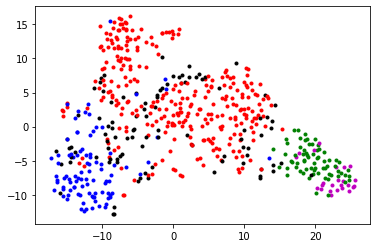

<ipython-input-140-794386e8bf16>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  x = plt.ginput(4)


<Figure size 432x288 with 0 Axes>

In [140]:
cdict = {1: 'b', 2: 'm', 3: 'r', 4:'k', 6:'g'}

for i in range(len(df['groupnumcrit'])):
    plt.plot(X_embedded[i,0],X_embedded[i,1],'.',c = cdict[group[i]])
    
plt.show()   # Like hold on

x = plt.ginput(4)
#Can assign unclassified units by nearest neighbor? now also the unclassified units sit on the borders - but the border within RS('r') isn't one that I was even aware of?

In [150]:
df.loc[X_embedded[:,1]>10,:].mean(axis = 0)
df.loc[X_embedded[:,1]>10,:]   # Think this group may be artifact of artificial limits and truncation on acorrmetric and logISIdrop at -1?
# To find corresponding row in MATLAB, add 1 to index
# Vast majority of these are acorr_metric = -1, percISI5 = 0, logISIdrop = -1.
# In this higher dimensional space, when there are no spikes within a particular window, the related metrics all get very close, if there are a few spikes, they diverge?

,groupnumcrit,log_spont,acorr_metric,log_peakmsISI,F50,percISI5,logISIdrop,max_burst_length,log_max_firing_rate
23,3.0,-0.241654,-0.847694,0.945600,-0.791657,-0.611866,-0.426636,-0.716177,-0.667320
29,3.0,-1.127467,0.098235,0.309463,-0.880630,-0.667149,-1.348435,-1.189087,-0.969197
62,3.0,-0.096220,-1.216216,0.399054,-0.168844,-0.667149,-1.348435,-0.243267,-0.194391
70,3.0,-0.681740,-1.766420,1.205385,-1.236523,-0.667149,-1.348435,-0.243267,0.047773
71,3.0,-0.884737,0.362437,0.309463,-0.480251,-0.667149,-1.348435,-0.873813,-0.428629
132,3.0,-1.534801,0.663721,-0.407252,-0.079871,-0.667149,-1.348435,-0.873813,-0.743228
167,3.0,-0.321669,-1.766420,1.026199,-0.302304,-0.667149,-1.348435,-0.873813,-0.627379
233,3.0,-0.241654,-1.328477,0.309463,-0.925117,-0.667149,-1.348435,-0.558540,-0.959753
270,3.0,-0.343415,-1.274733,-0.048898,-0.969603,-0.667149,-1.348435,-0.873813,-0.326279
338,1.0,-0.305850,-1.766420,0.667829,0.498455,-0.667149,-1.348435,-0.873813,-1.325526


In [193]:
X_embedded = TSNE(n_components=2, learning_rate=100, perplexity = 35).fit_transform(X)

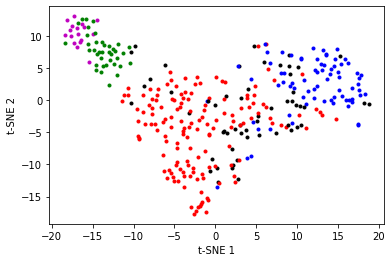

In [194]:
cdict = {1: 'b', 2: 'm', 3: 'r', 4:'k', 6:'g'}

for i in range(len(df['groupnumcrit'])):
    plt.plot(X_embedded[i,0],X_embedded[i,1],'.',c = cdict[group[i]])
 
fig1 = plt.gcf()
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()   # Like hold on
fig1.savefig('C:/Users/Ping/Desktop/XPL_Wang_Lab/paper_code/Python/tSNE_figs/tSNE_perpl40.png')

# This is now with latency


In [125]:
X_MDS = MDS(n_components=2, max_iter=300, n_init=1).fit_transform(X)

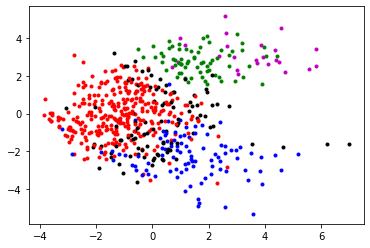

In [126]:
for i in range(len(df['groupnumcrit'])):
    plt.plot(X_MDS[i,0],X_MDS[i,1],'.',c = cdict[group[i]])
    
plt.show()   # Like hold on
#plt.plot(X_MDS[:,0],X_MDS[:,1],'r.')